# ANÁLISE LOTOFÁCIL  (CONCURSOS E GANHADORES)

 - Quantidade de concursos por ano e mês
 - Quantidade de ganhadores por ano e mês  
 - Análise de série temporal  
 

**Observação:** `Será necessário alterando para o diretório raíz do projeto para poder fazer imports locais`

In [1]:
%cd ..

c:\Users\Vedovi\lotofacil\lotofacil


### Importações

In [2]:
# Ignorar avisos do Arima
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning  
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', ValueWarning)

# Importa a função para gerar a base de dados
from processamento.indice_resultado import dados_indice

# Importando pacote para análise de série temporal
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima.model import ARIMA  # novo caminho
from pmdarima.arima import auto_arima

# Criar gráfico
import plotly.graph_objs as go

# Para mostrar o gráfico no notebook 
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Criar gráfico
import matplotlib.pyplot as plt
%matplotlib inline

# Para formatar datas
from datetime import datetime

### Funções

In [3]:

def grafico_linha_plt(x, y, title, xlabel, ylabel):
    """
    Função para criar um gráfico de linhas utilizando o Matplotlib.
    
    Parâmetros:
    x      -> Valores do eixo (x)
    y      -> Valores do eixo (y)
    title  -> Título do gráfico
    xlabel -> Rótulo do eixo (x)
    ylabel -> Rótulo do eixo (y)
    
    """
    
    # Define as dimenssões do gráfico
    plt.figure(figsize=(15, 5))
    
    # Define o título, rótulo x, rótulo y
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Cria o gráfico
    plt.plot(x, y, color='purple', marker='o', linestyle='dashed', linewidth=1.5, markersize=4)
    # Formata a linha de grade do gráfico
    plt.grid(linestyle='--', which='major', color='grey', alpha=.25)
    # Visualiza o gráfico
    plt.show()
    
    
def grafico_linha_go(x, y, title, xlabel, ylabel):
    """
    Função para criar um gráfico de linhas utilizando o Plotly.
    
    Parâmetros:
    x      -> Valores do eixo (x)
    y      -> Valores do eixo (y)
    title  -> Título do gráfico
    xlabel -> Rótulo do eixo (x)
    ylabel -> Rótulo do eixo (y)
    
    """
    
    # Criando o gráfico
    trace = go.Scatter(x=x, y=y, mode='markers+lines')

    # Armazenando gráfico em uma lista
    grafico = [trace]

    # Criando Layout
    layout = go.Layout(title=title, xaxis={'title': xlabel}, yaxis={'title': ylabel})

    # Criando figura que será exibida
    fig = go.Figure(data=grafico, layout=layout)

    # Visualiza o gráfico
    py.iplot(fig)

### Definição e análise dos dados

In [4]:
# Criando a base de dados
base = dados_indice()

In [5]:
# Mostra as informações da base de dados
base.info()

<class 'pandas.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Concurso      3603 non-null   int64
 1   Indice        3603 non-null   int64
 2   Data Sorteio  3603 non-null   str  
 3   Ganhou        3603 non-null   int64
 4   Dia           3603 non-null   str  
 5   Mes           3603 non-null   str  
 6   Ano           3603 non-null   str  
dtypes: int64(3), str(4)
memory usage: 197.2 KB


In [6]:
# Converte para o tipo data
base['Data Sorteio'] = base['Data Sorteio'].apply(lambda _: datetime.strptime(_, '%d/%m/%Y'))

In [7]:
# Visualizando os tipos dos dados
base.dtypes

Concurso                 int64
Indice                   int64
Data Sorteio    datetime64[us]
Ganhou                   int64
Dia                        str
Mes                        str
Ano                        str
dtype: object

In [8]:
# Visualiza as 5 primeiras linhas
base.head()

,Concurso,Indice,Data Sorteio,Ganhou,Dia,Mes,Ano
0,1,2320459,2003-09-29,5,29,09,2003
1,2,1672791,2003-10-06,1,06,10,2003
2,3,1768501,2003-10-13,2,13,10,2003
3,4,797916,2003-10-20,1,20,10,2003
4,5,927593,2003-10-27,2,27,10,2003


In [9]:
# Quantidade de concursos por ano
concursos_ano = base.groupby('Ano')['Concurso'].count()
concursos_ano

Ano
2003     14
2004     52
2005     52
2006     63
2007    104
2008    103
2009    104
2010    104
2011    104
2012    149
2013    151
2014    152
2015    152
2016    151
2017    150
2018    152
2019    153
2020    211
2021    290
2022    292
2023    289
2024    290
2025    293
2026     28
Name: Concurso, dtype: int64

In [10]:
# Quantidade de ganhadores por ano
ganhadores = base.groupby('Ano')['Ganhou'].sum()
ganhadores

Ano
2003     33
2004    219
2005    224
2006    294
2007    334
2008    472
2009    412
2010    389
2011    419
2012    814
2013    692
2014    688
2015    508
2016    486
2017    506
2018    547
2019    614
2020    674
2021    707
2022    763
2023    723
2024    774
2025    695
2026     52
Name: Ganhou, dtype: int64

In [11]:
# Definindo os dados para analisar a quantidade de concursos por ano
x_concursos = []
y_concursos = []

for k, v in dict(concursos_ano).items():
    x_concursos.append(k)
    y_concursos.append(v)

In [12]:
# Definindo os dados para analisar a quantidade de ganhadores por ano
x_ganhadores = []
y_ganhadores = []

for k, v in dict(ganhadores).items():
    x_ganhadores.append(k)
    y_ganhadores.append(v)

**Análise com o Plotly**

In [13]:
grafico_linha_go(x_ganhadores, y_ganhadores, 'Ganhadores x Ano', 'Ano', 'Quantidade de Ganhadores')

In [14]:
grafico_linha_go(x_concursos, y_concursos, 'Concursos x Ano', 'Ano', 'Quantidade de Concursos')

**Análise com o Matplotlib**

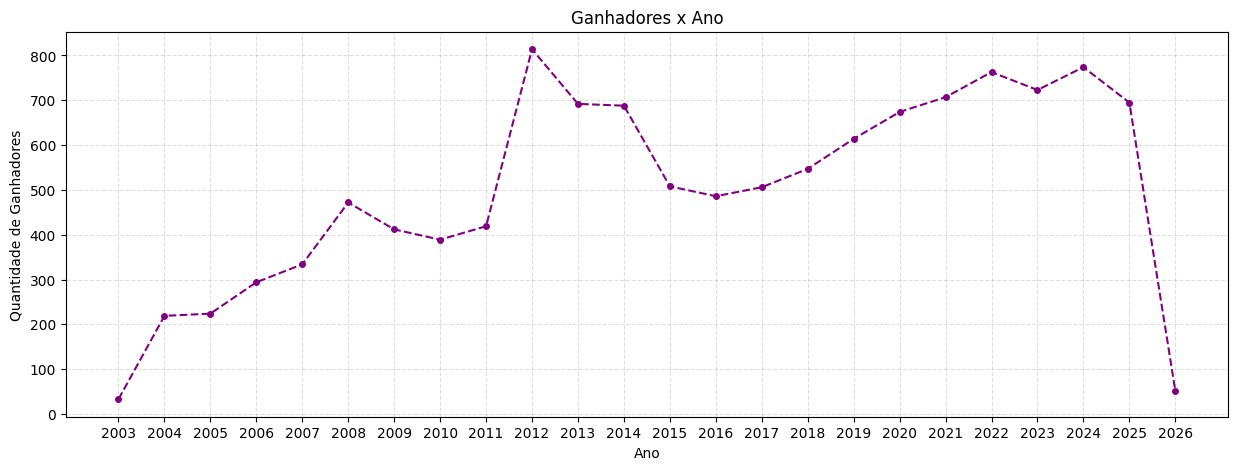

In [15]:
grafico_linha_plt(x_ganhadores, y_ganhadores, 'Ganhadores x Ano', 'Ano', 'Quantidade de Ganhadores')

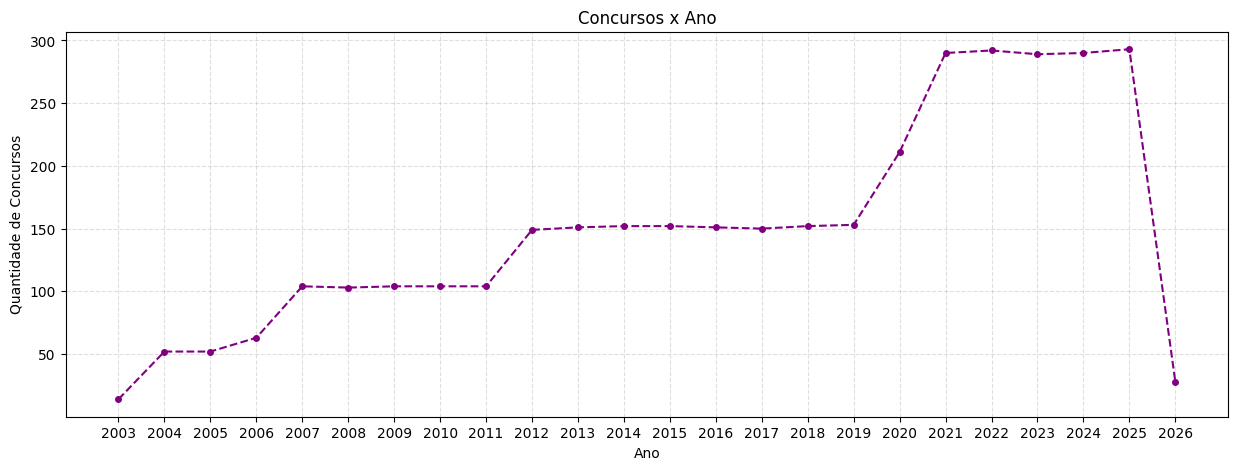

In [16]:
grafico_linha_plt(x_concursos, y_concursos, 'Concursos x Ano', 'Ano', 'Quantidade de Concursos')

In [17]:
# Definindo últimos anos
base['Ano'] = base['Ano'].astype('int64')
ano_max = int(base['Ano'].max())
ano_min = ano_max - 9

In [18]:
# Quantidade de concursos por mês nos últimos 5 anos
concursos_5_anos = (
    base[base['Ano'] >= ano_min]
    .groupby(['Ano', 'Mes'])['Concurso']
    .count()
)
concursos_5_anos

Ano   Mes
2017  01     13
      02     11
      03     14
      04     12
      05     13
             ..
2025  10     27
      11     23
      12     25
2026  01     27
      02      1
Name: Concurso, Length: 110, dtype: int64

In [19]:
# Quantidade de ganhadores por mês nos últimos 5 anos
ganhadores_5_anos = (
    base[base['Ano'] >= ano_min]
    .groupby(['Ano', 'Mes'])['Ganhou']
    .sum()
)
ganhadores_5_anos

Ano   Mes
2017  01     45
      02     31
      03     38
      04     19
      05     44
             ..
2025  10     65
      11     54
      12     60
2026  01     50
      02      2
Name: Ganhou, Length: 110, dtype: int64

In [20]:
# Quantidade média de ganhadores por concurso em cada mês nos últimos 5 anos
media_ganhadores_5_anos = (
    base[base['Ano'] >= ano_min]
    .groupby(['Ano', 'Mes'])['Ganhou']
    .mean()
    .round()
)
media_ganhadores_5_anos

Ano   Mes
2017  01     3.0
      02     3.0
      03     3.0
      04     2.0
      05     3.0
            ... 
2025  10     2.0
      11     2.0
      12     2.0
2026  01     2.0
      02     2.0
Name: Ganhou, Length: 110, dtype: float64

A partir de 2012, a quantidade de concurso começou a manter um padrão linear. Com base neste fato, iremos análisar o intervalo de tempo a partir deste ano.

In [ ]:
ano_min=2012

In [21]:
# Dados análise
analise = base[base['Ano'] >= ano_min]

In [22]:
# Obtém os indices dos concursos que possuem e não possuem vencedores de acordo com o período estipulado
indice_c = base[(base['Ganhou'] > 0) & (base['Ano'] >= ano_min)]
indice_s = base[(base['Ganhou'] == 0) & (base['Ano'] >= ano_min)]

In [23]:
# Quantidade de concursos com e sem vencedores
s_vencedor = len(indice_s)
c_vencedor = len(indice_c)

In [24]:
# Quantidade
print(
    f'Qtde concurso sem vencedores: {s_vencedor}'
    f'\nQtde concurso com vencedores: {c_vencedor}'
    f'\nTotal: {len(analise)}'
)

Qtde concurso sem vencedores: 335
Qtde concurso com vencedores: 1813
Total: 2148


## ANÁLISE DE SÉRIE TEMPORAL

In [25]:
# Reajustando os dados
ts = analise.query('Ano <= "2020"')
ts.reset_index(drop=True, inplace=True)

TypeError: Invalid comparison between dtype=int64 and str

In [ ]:
# Reajustando o campo de data
for indice, valor in ts['Data Sorteio'].items():
    ts.loc[indice, 'Data Sorteio'] = datetime.strptime(valor.strftime('%Y-%m'), '%Y-%m')

In [ ]:
# Agregando os dados
ts = ts.groupby('Data Sorteio')['Ganhou'].sum()

In [ ]:
# Quantidade de meses no perído que será avaliado
len(ts)

108

**Será avaliado no período:**

1 - _Tendência_  
2 - _sazionalidade_  
3 - _Variação_

In [ ]:
grafico_linha_go(ts.index, ts.values, 'Ganhadores x Período', 'Período', 'Ganhadores');

In [ ]:
# Decomposição da série temporal
decomposicao = seasonal_decompose(ts)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

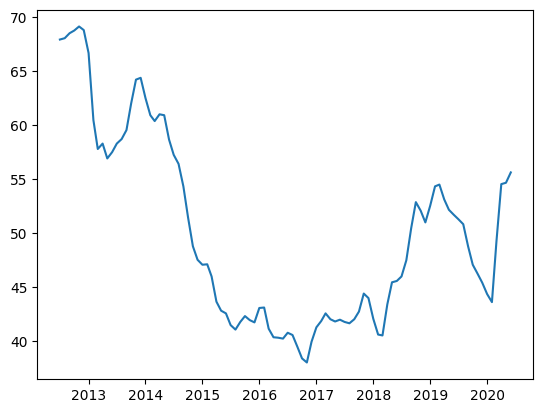

In [ ]:
# Analisa a tendência
plt.plot(tendencia);

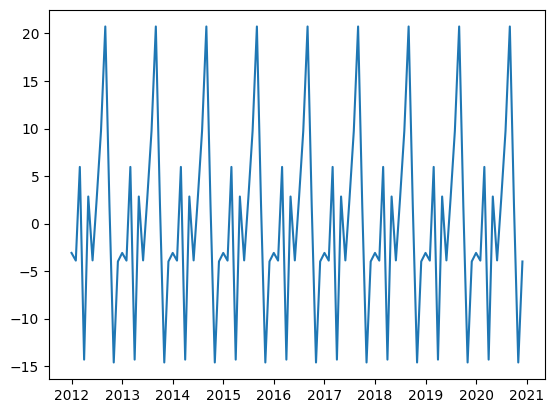

In [ ]:
# Analisa a sazionalidade
plt.plot(sazonal);

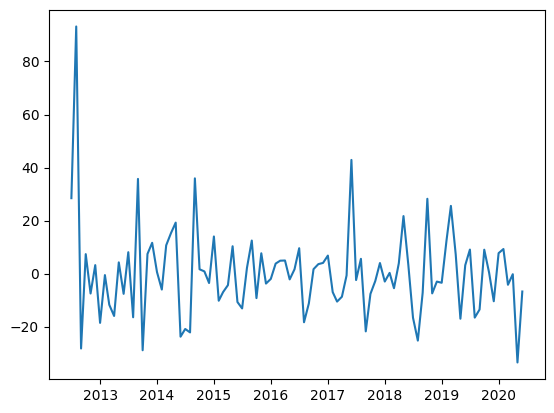

In [ ]:
# Analisa as variações no período
plt.plot(aleatorio);

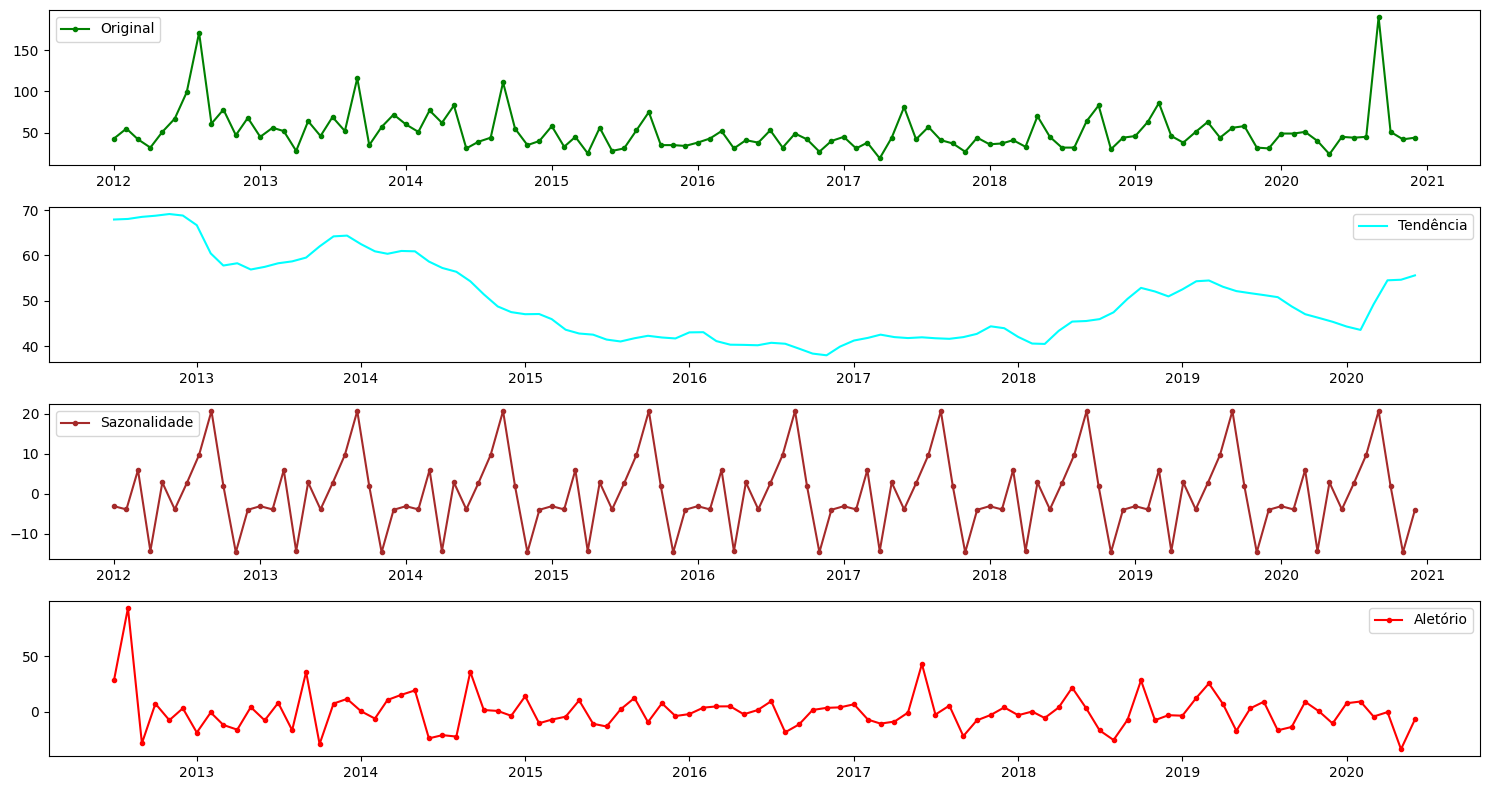

In [ ]:
# Agrupado
plt.figure(figsize=(15, 8))

plt.subplot(4,1,1)
plt.plot(ts, label = 'Original', color='green', marker='o', linestyle='solid', linewidth=1.5, markersize=3)
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência', color='cyan', marker='None', linestyle='solid', linewidth=1.5, markersize=3)
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade', color='brown', marker='o', linestyle='solid', linewidth=1.5, markersize=3)
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aletório', color='red', marker='o', linestyle='solid', linewidth=1.5, markersize=3)
plt.legend(loc = 'best')
plt.tight_layout()

**PREVISÃO DE GANHADORES PARA OS PRÓXIMOS CONCURSOS**  

In [ ]:
# Obtendo os parâmetros de ajuste do modelo
param = auto_arima(ts, m=12, seasonal=True, trace=False, suppress_warnings=True)
param.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  108
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood                -496.563
Date:                  Fri, 06 Feb 2026   AIC                            999.127
Time:                          17:28:40   BIC                           1007.173
Sample:                      01-01-2012   HQIC                          1002.389
                           - 12-01-2020                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.5468      6.696      5.010      0.000      20.423      46.671
ar.S.L12       0.3597      0.086      4.197      0.000       0.192       0.528
sigma2       568.1878     45.520     12.482      0.000     478.970     657.405
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):               864.87
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             2.93
Prob(H) (two-sided):                  0.89   Kurtosis:                        15.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Criação e visualização das informações do modelo
modelo = ARIMA(ts, order=(0, 1, 1))
treino_modelo = modelo.fit()
treino_modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Ganhou   No. Observations:                  108
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -496.566
Date:                Fri, 06 Feb 2026   AIC                            997.131
Time:                        17:28:40   BIC                           1002.477
Sample:                    01-01-2012   HQIC                           999.298
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9226      0.073    -12.614      0.000      -1.066      -0.779
sigma2       617.6416     34.514     17.896      0.000     549.996     685.287
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):               847.31
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             2.91
Prob(H) (two-sided):                  0.93   Kurtosis:                        15.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Previsões para os próximos meses (steps = quantidade de meses)
previsao = treino_modelo.forecast(steps=12)

In [ ]:
previsao

2021-01-01    54.22697
2021-02-01    54.22697
2021-03-01    54.22697
2021-04-01    54.22697
2021-05-01    54.22697
2021-06-01    54.22697
2021-07-01    54.22697
2021-08-01    54.22697
2021-09-01    54.22697
2021-10-01    54.22697
2021-11-01    54.22697
2021-12-01    54.22697
Freq: MS, Name: predicted_mean, dtype: float64

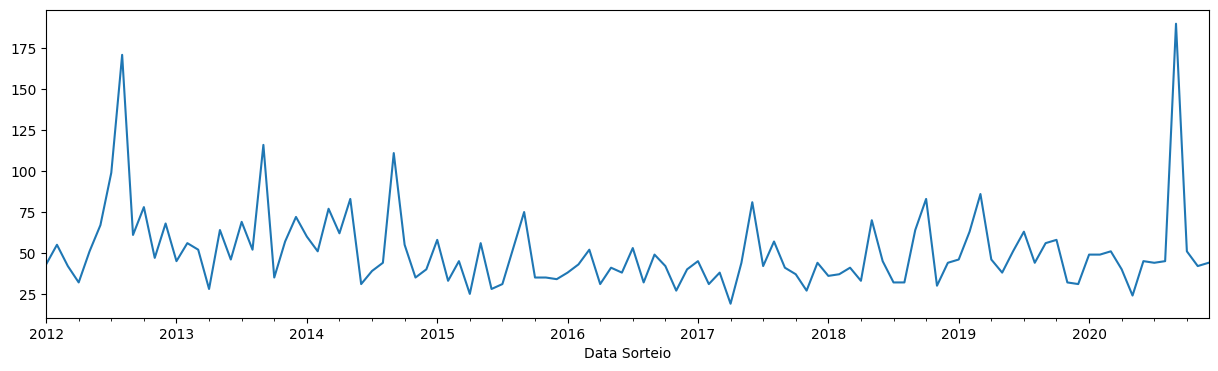

In [ ]:
# Série original
plt.figure(figsize=(15, 4))
serie_original = ts.plot()

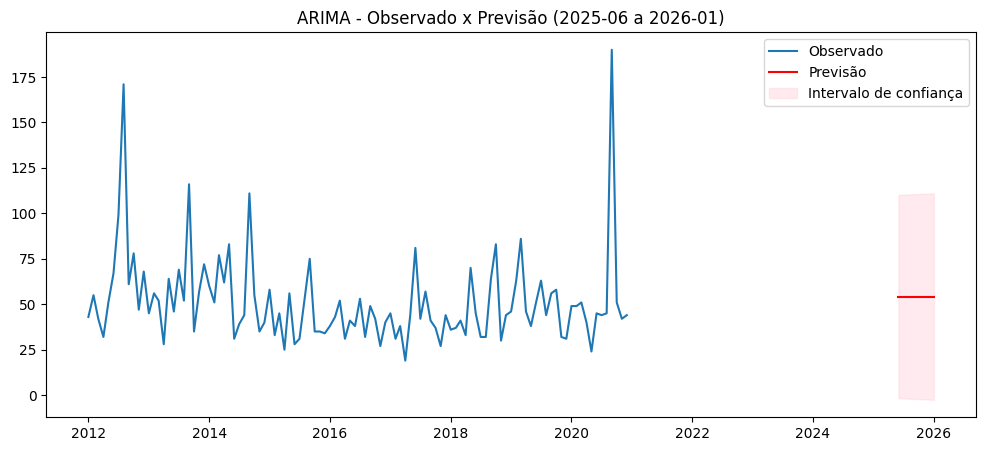

In [ ]:
# Plotando as previsões

fig, ax = plt.subplots(figsize=(12, 5))

# Série observada
ax.plot(ts, label='Observado')

# Previsão com intervalo de confiança
pred = treino_modelo.get_prediction(start='2025-06-01', end='2026-01-01')
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

ax.plot(pred_mean.index, pred_mean, label='Previsão', color='red')
ax.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='Intervalo de confiança'
)

ax.legend()
ax.set_title('ARIMA - Observado x Previsão (2025-06 a 2026-01)')
plt.show()